# 모두 카페

In [1]:
# 필요한 라이브러리 호출하기 및 데이터 로드
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 스타일 기본 설정
plt.style.use('default')
plt.rcParams['font.family'] = 'NanumGothic' 

In [3]:
# 데이터 호출하기
entry_data = pd.read_csv('/aiffel/data/entry_data.csv')
sales_data = pd.read_csv('/aiffel/data/sales_data.csv')
item_data = pd.read_csv('/aiffel/data/item_data.csv')
item_entry_data = pd.read_csv('/aiffel/data/item_entry_data.csv')

## 데이터 정보 확인

In [4]:
entry_data.head()

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928


In [5]:
sales_data.head()

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507


In [6]:
item_data.head()

,구분,분류,상품명,판매금액
0,1,게임&TV,이어폰(커널형),"3,000원"
1,2,디저트,초코머핀,"3,500원"
2,3,디저트,쿠키(초코칩),"1,500원"
3,4,디저트,쿠키(마카다미아),"1,500원"
4,5,디저트,미니마카롱(3개),"2,000원"


In [7]:
item_entry_data.head()

,순위,분류,상품명,판매금액
0,1,한국대생,한국대생 요금제,"2,000원"
1,2,심야-조조,심야-조조 요금제,"5,000원"
2,3,일반인,일반요금제,"2,500원"
3,4,한국대생,한국대생 요금제,"2,500원"
4,5,일반인,일반요금제,"2,000원"


### 데이터 분석
#### 필수 문제 1 : 월별 매출액 추세(sales_data사용)`

In [8]:
# 활용할 데이터(sales_data)를 temp_var로 정의하기
temp_var = sales_data

# 월별로 나누기 위해서 결제 일시를 월단위로 구분
temp_var['date'] = sales_data['결제일시'].str[:7]
# 결제금액을 숫자형으로 바꾸기 위하여 ,를 제거하고 numeric을 이용해서 변환
temp_var['결제금액'] = pd.to_numeric(temp_var['결제금액'].str.replace(',', ''))

In [9]:
temp_var.head()

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,4500,customer275507,2022-04
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,5500,customer275507,2022-04
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,4000,customer275507,2022-04
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,1000,customer275507,2022-04
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,5000,customer275507,2022-04


In [10]:
### 월별로 결제금액을 집계 월별을 기준으로 결제금액의 합계로 group
payment_data =temp_var.groupby(['date']).agg({'결제금액': 'sum'})
payment_data

,결제금액
date,
2021-02,7000
2021-03,2104500
2021-04,3116600
2021-05,2537000
2021-06,3621500
2021-07,1215000
2021-08,1229000
2021-09,1197500
2021-10,2138500


### 월 매출 추세 ##

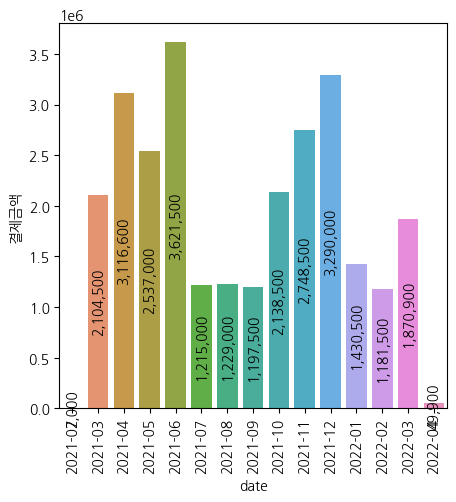

In [11]:
# 집계 결과를 시각화하기
plt.figure(figsize=(5,5))
ax = sns.barplot(data=payment_data,x=payment_data.index, y ='결제금액')
containers = ax.containers[0]
#각 바에 대한 라벨 설정
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center', rotation=90)
## x축이 가로로 되어있으면 가독성이 떨어지기에 세로로 출력
plt.xticks(rotation=90) 
plt.show()

In [12]:
temp_var = temp_var[temp_var['판매수량'] != -1]
items_counts = temp_var['상품명'].value_counts()

# 집계 결과를 데이터프레임으로 변환하고, 상위 10개 선정하기
items_count = pd.DataFrame({'상품명': items_counts.index, '판매량': items_counts.values}).head(10)
items_count

,상품명,판매량
0,김치볶음밥,1204
1,라면,749
2,짜장라면,455
3,치즈불고기볶음밥,420
4,계란추가,314
5,낙지볶음밥,312
6,새우볶음밥,309
7,아메리카노(ICE),284
8,치즈감자튀김,246
9,감자튀김,242


In [13]:
# 한글이 포함된 시각화를 위해 Matplotlib 설정
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager.findfont(font)

'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

### 가장 인기있는 음식/음료

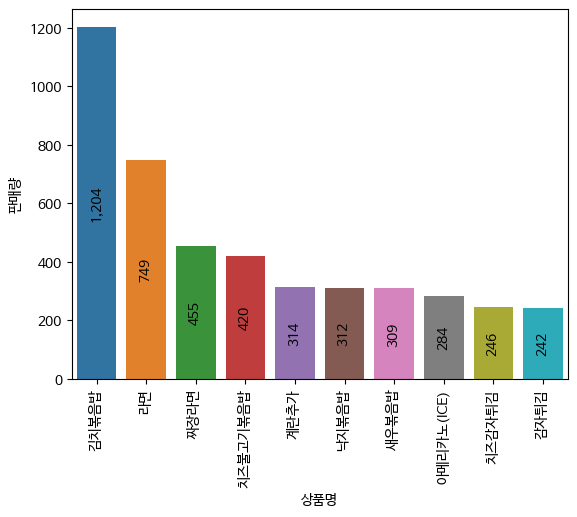

In [14]:
# 집계 결과를 시각화하기
ax = sns.barplot(data=items_count,x='상품명', y ='판매량')
containers = ax.containers[0]
# 각 바에 대한 라벨설정
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center', rotation=90)
## x축이 가로로 되어있으면 가독성이 떨어지기에 세로로 출력
plt.xticks(rotation=90) 
plt.show()

In [15]:
# temp_var의 payment열을 상품명을 기준으로 집계하기
items_payment = temp_var.groupby(['상품명']).agg({'결제금액':'sum'})
items_payment
# item_payment의 값을 내림차순으로 정렬하고 상위 10개 도출하기
items_payment = items_payment.sort_values(by='결제금액', ascending=False).head(10)
items_payment

,결제금액
상품명,
김치볶음밥,6004400
라면,2941500
치즈불고기볶음밥,2292600
짜장라면,2038500
낙지볶음밥,1710700
새우볶음밥,1539800
치즈감자튀김,1354200
감자튀김,1083800
아메리카노(ICE),1058100


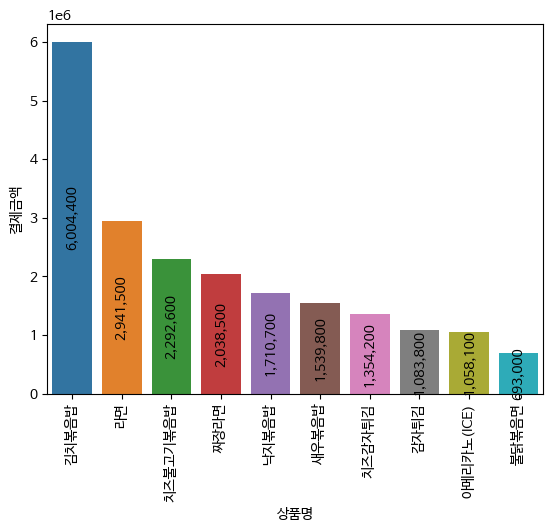

In [16]:
ax = sns.barplot(data=items_payment,x=items_payment.index, y ='결제금액')
containers = ax.containers[0]
# 각 바에대한 라벨 설정
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center', rotation=90)
## x축이 가로로 되어있으면 가독성이 떨어지기에 세로로 출력
plt.xticks(rotation=90) 
plt.show()

### 가장 많이 팔린 입장권 종류 ###

In [37]:
# 문제 3: 가장 많이 팔린 입장권 종류
# 활용할 데이터(entry_data)를 temp_var로 정의하기
temp_var = entry_data
temp_var.info()
### 주석 처리한 이유는 밑에 있음
# temp_var의 금액을 숫자형태로 변환하기
# temp_var['금액'] = pd.to_numeric(temp_var['금액'].str.replace(',', ''))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22555 entries, 0 to 22554
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   요금제명    22292 non-null  object
 1   입실      22555 non-null  object
 2   퇴실      22555 non-null  object
 3   이용      22533 non-null  object
 4   위치      22555 non-null  object
 5   금액      22555 non-null  int64 
 6   구분      22555 non-null  object
 7   고객      22555 non-null  object
 8   입실(24)  22555 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.5+ MB


# 주석 처리한 이유는 애초에 int64형태이기에 주석처리를 하였다.

In [18]:
# temp_var의 금액을 요금제명을 기준으로 집계하기
tickets=temp_var.groupby(['요금제명']).agg({'금액': 'sum'})
# tickets의 값을 내림차순으로 정렬하고 상위 10개 도출하기
tickets=tickets.sort_values(by='금액', ascending=False).head(10)
tickets

,금액
요금제명,
한국대생 입장권(종일권),70037000
입장권(종일권),23570500
심야-조조무제한(06시까지),11600000
심야-조조무제한,6221000
한국대생 무제한 입장권,5207500
시간요금제(1시간),2665500
시간요금제(3시간),2042000
무제한 입장권,1568600
18시이후 무제한,1330500


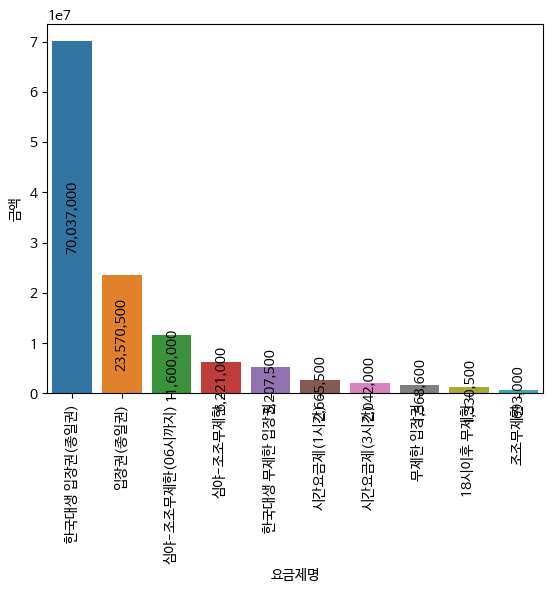

In [19]:
ax = sns.barplot(data=tickets,x=tickets.index, y ='금액')
containers = ax.containers[0]
# 각 바에대한 라벨 설정
ax.bar_label(containers, labels=[f'{x:,.0f}' for x in containers.datavalues], label_type='center', rotation=90)
## x축이 가로로 되어있으면 가독성이 떨어지기에 세로로 출력
plt.xticks(rotation=90) 
plt.show()

## 내 Key Question을 중심으로 다양한 분석을 진행해봅시다.
#### 나의 key question - 시간대 별로 얼마나 방문하였는가 또한 해당 시간대에 어떠한 메뉴들이 많이 팔렸는가
#### 방문자들의 매점 구매 비율 ####
* entry_data - 요금제이용 데이터
* sales_data - 상품 결제 데이터
* item_data - 상품의 가격
* item_entry_data - 요금제의 가격

In [20]:
## 처리한 데이터들이 시간에 따라 얼마나 방문 하였는가를 분석하는것 -> 즉, 결제가 된 데이터들의 시간들에 따라서 분류
temp_var = entry_data 
temp_var.head()

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928


In [21]:
### 이용한 시간들을 금액에 따라 분류
from datetime import datetime
## 데이터들을 시간대 별로 구분하기 위하여 슬라이싱
temp_var['입실(24)'] = temp_var['입실'].str[10:-3]
temp_var['입실(24)']

0         23
1         23
2         20
3         20
4         19
        ... 
22550     13
22551     13
22552     13
22553     13
22554     12
Name: 입실(24), Length: 22555, dtype: object

In [22]:
time_pay = temp_var.groupby(['입실(24)']).agg({'금액': 'sum'})
## 데이터 프레임의 인덱스가 문자열로 인식되어 있어 정렬시 1다음 숫자가 10이 되어 숫자형으로 변경 후 정렬
time_pay.index = pd.to_numeric(time_pay.index)
time_pay = time_pay.sort_index()
time_pay


,금액
입실(24),
0,2612000
1,1424500
2,1145500
3,350000
4,277000
5,452000
6,605000
7,346500
8,692500


In [23]:
time_count = temp_var.groupby(['입실(24)']).agg({'입실': 'count'})
## 데이터 프레임의 인덱스가 문자열로 인식되어 있어 정렬시 1다음 숫자가 10이 되어 숫자형으로 변경 후 정렬
time_count.index = pd.to_numeric(time_count.index)
time_count = time_count.sort_index()
time_count

,입실
입실(24),
0,526
1,293
2,239
3,77
4,58
5,98
6,144
7,131
8,242


Text(0.5, 1.0, '시간별 입실')

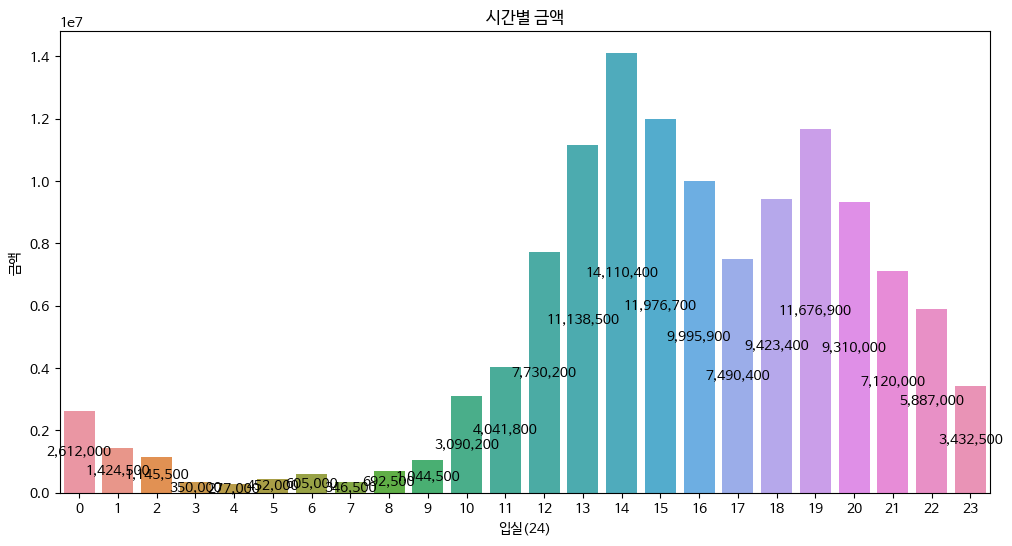

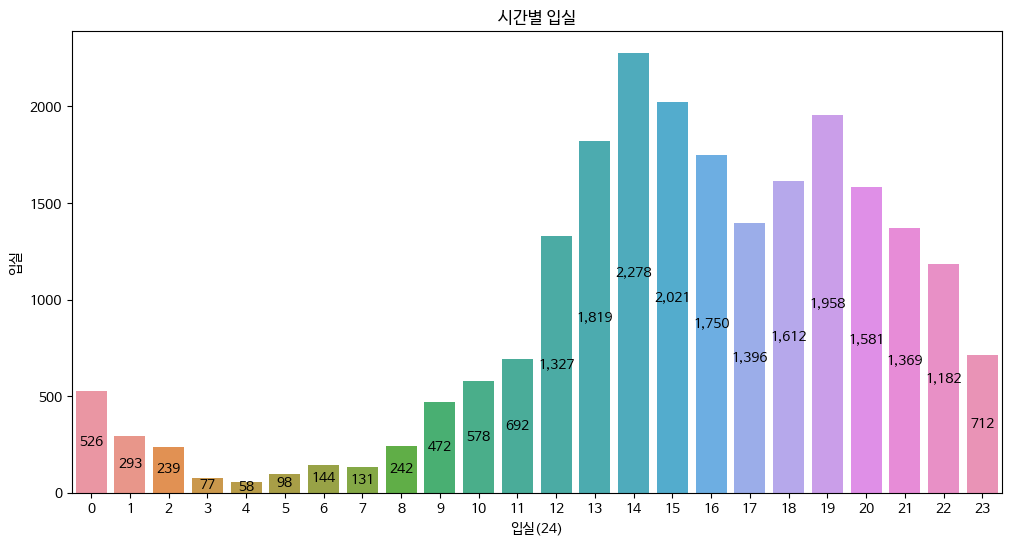

In [24]:
## 그래프1 = 결제 금액
plt.figure(figsize=(12, 6))
ax1 = sns.barplot(data=time_pay, x=time_pay.index, y='금액')
containers1 = ax1.containers[0]
## label 넣기
ax1.bar_label(containers1, labels=[f'{x:,.0f}' for x in containers1.datavalues], label_type='center', fontsize=10)
plt.xlabel('입실(24)')
ax1.set_ylabel('금액')
plt.title('시간별 금액')

# 그래프 2 = 시간별 입장수
plt.figure(figsize=(12, 6))
ax2 = sns.barplot(data=time_count, x=time_count.index, y='입실')
containers2 = ax2.containers[0]
ax2.bar_label(containers2, labels=[f'{x:,.0f}' for x in containers2.datavalues], label_type='center', fontsize=10)
plt.xlabel('입실(24)')
ax2.set_ylabel('입실')
plt.title('시간별 입실')

#### 시간대 별로 금액과 이용자 수의 차이를 보았을 때 13시~ 19시까지의 매출이 매우 높게 나왔으며, 학교의 시작 시간인 9시부터 조금씩 증가하기 시작하였다.
#### 그렇다면 시간대 별로 많이 팔리는 메뉴들은 무엇이 있을까?

In [25]:
temp_var = sales_data
## 전 내용에서 하였던과 동일하게 시간대 별로 슬라이싱하고 group화
temp_var['입실(24)'] = temp_var['결제일시'].str[10:-3]
time_menu = temp_var.groupby(['입실(24)','상품명']).agg({'상품명': 'count'})
time_menu.rename(columns={'상품명':'수량'}, inplace=True)
time_menu

수량
입실(24) 상품명           
 00    감자튀김         5
       계란추가         3
       고구마라떼(ICE)   1
       김치볶음밥       15
       낙지볶음밥        2
...                ..
 23    치즈케이크        2
       쿠키(마카다미아)    2
       쿠키(오트밀)      1
       쿠키(초코칩)      1
       허니밀크쉐이크      1

[868 rows x 1 columns]

In [26]:
### 데이터가 너무 많고 시각화하기에는 상품명의 종류가 많기 때문에 시간대 별로 잘팔린 상품 5개씩
time_menu = time_menu.sort_values(by=['입실(24)', '수량'], ascending=[True, False])
time_menu = time_menu.groupby('입실(24)').head(5)
time_menu.T

입실(24)  00                                      01         07               \
상품명     라면 김치볶음밥 아메리카노(ICE) 짜장라면 치즈감자튀김 아메리카노(ICE) 아메리카노(ICE) 라면 초코라떼(ICE)   
수량      19    15         12   10      9          2          2  1         1   

입실(24)  08  ...  22                           23                       
상품명     라면  ...  라면 김치볶음밥 짜장라면 치즈감자튀김 계란추가 김치볶음밥  라면 계란추가 짜장라면 치즈감자튀김  
수량       1  ...  24    21   14     12   10    19  19    9    8      8  

[1 rows x 86 columns]

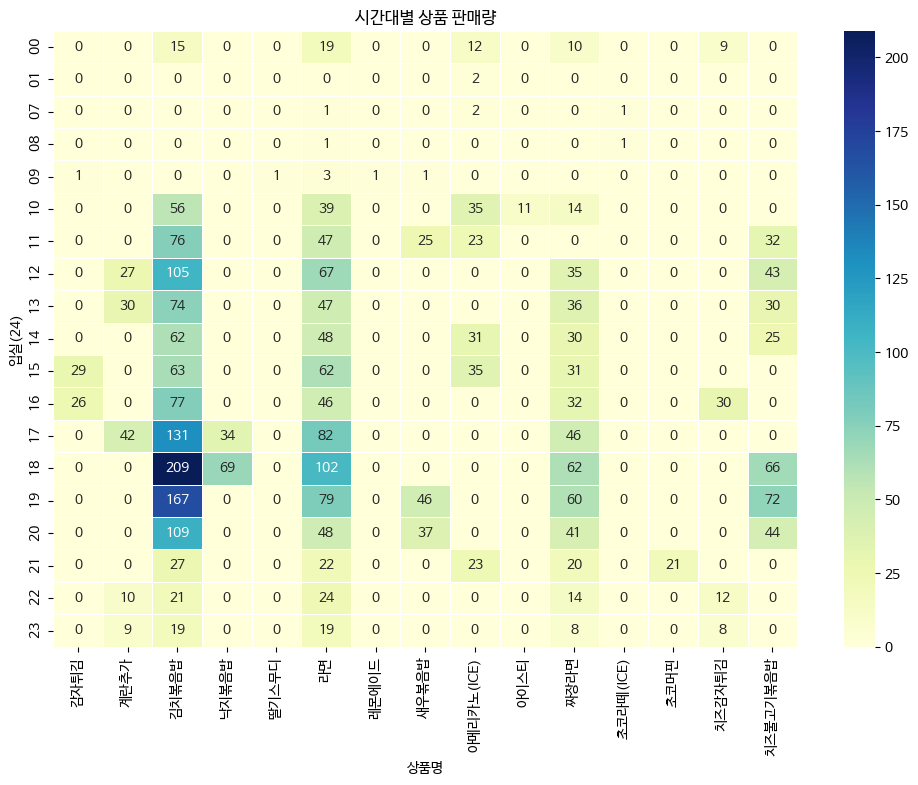

In [27]:
## pivot테이블
pivot_table = time_menu.pivot_table(index='입실(24)', columns='상품명', values='수량', aggfunc='sum', fill_value=0)

# 히트맵 그리기
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d', linewidths=0.5)
plt.title('시간대별 상품 판매량')
plt.xlabel('상품명')
plt.ylabel('입실(24)')
plt.show()

#### 저녘시간대에 식사를 할수 있는메뉴인 김치볶음밥, 라면등이 많이 팔렸다.

### 혹시 월별로 나누었을때 는?

In [28]:
temp_var = sales_data
## 전 내용에서 하였던과 동일하게 시간대 별로 슬라이싱하고 group화
temp_var['월'] = temp_var['결제일시'].str[5:-9]
temp_var
month_menu = temp_var.groupby(['월','상품명']).agg({'상품명': 'count'})
month_menu.rename(columns={'상품명':'수량'}, inplace=True)

month_menu

수량
월  상품명                  
01 (면)계란추가-국물라면        3
   (면)계란후라이 추가-불닭/짜장   6
   (면)치즈추가             5
   (밥)계란후라이 추가         2
   (밥)슈레드치즈추가          1
...                   ..
12 쿠키(오트밀)             3
   쿠키(초코칩)            11
   페퍼민트(ICE)           1
   플레인요거트스무디           2
   허니밀크쉐이크             2

[651 rows x 1 columns]

In [38]:
### 데이터가 너무 많고 시각화하기에는 상품명의 종류가 많기 때문에 시간대 별로 잘팔린 상품 5개씩
month_menu = month_menu.sort_values(by=['월', '수량'], ascending=[True, False])
month_menu = month_menu.groupby('월').head(5)
month_menu.T

월    01                        02                         ...    11           \
상품명  라면 김치볶음밥 짜장라면 샷추가 소떡소떡 김치볶음밥  라면 짜장라면 소떡소떡 치즈불고기볶음밥  ... 김치볶음밥  라면 짜장라면   
수량   46    39   24  18   15    27  21   19   14       13  ...   140  83   45   

월                      12                             
상품명 치즈감자튀김 치즈불고기볶음밥 김치볶음밥   라면 짜장라면 아메리카노(ICE) 낙지볶음밥  
수량      41       40   134  103   56         49    47  

[1 rows x 60 columns]

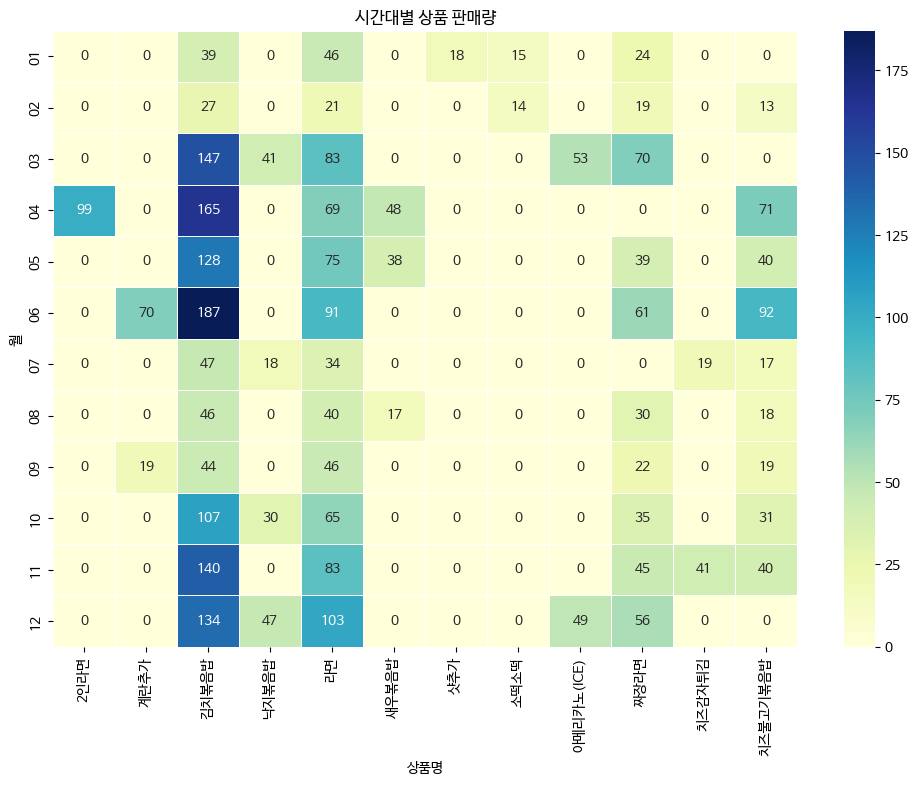

In [30]:
pivot_table = month_menu.pivot_table(index='월', columns='상품명', values='수량', aggfunc='sum', fill_value=0)

# 히트맵 그리기
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d', linewidths=0.5)
plt.title('시간대별 상품 판매량')
plt.xlabel('상품명')
plt.ylabel('월')
plt.show()

### 확실히 방학기간에는 주문의 수량이 떨어지는 경향이 있다.

이 두개의 히트맵을 합쳐서 하나의 히트맵으로

In [42]:
temp_var = sales_data
## 전 내용에서 하였던과 동일하게 시간대 별로 슬라이싱하고 group화
temp_var['월'] = temp_var['결제일시'].str[5:-9]
temp_var['시간(24)'] = temp_var['결제일시'].str[10:-3]
temp_var[['결제일시','시간(24)']]
monthtime_menu = temp_var.groupby(['월','시간(24)','상품명']).agg({'상품명': 'count'})
monthtime_menu.rename(columns={'상품명':'수량'}, inplace=True)
monthtime_menu = monthtime_menu.groupby('수량').head(2)
monthtime_menu.T

월                01                                                      ...  \
시간(24)           00           10                  11        12           ...   
상품명    오늘은 순살닭다리 덮밥 (면)계란추가-국물라면 라면 샷추가 청귤차(HOT)  라면 샷추가 김치볶음밥 라면 새우볶음밥  ...   
수량                1            1  3   3        2   2  13     9  5     4  ...   

월         06                                     10          11    12  
시간(24)    12    17    18    19             20    12    17    18    19  
상품명    김치볶음밥 김치볶음밥 김치볶음밥 김치볶음밥 치즈불고기볶음밥 김치볶음밥 김치볶음밥 김치볶음밥 김치볶음밥 김치볶음밥  
수량        15    24    34    25       19    27    16    21    20    19  

[1 rows x 51 columns]

In [43]:
! pip install plotly

In [44]:
import plotly.express as px

# 데이터프레임에서 필요한 부분만 추출
subset_df = monthtime_menu.reset_index()

# 3D scatter plot 그리기
fig = px.scatter_3d(subset_df, x='월', y='시간(24)', z='수량', color='상품명', size='수량')

# 그래프 표시
fig.update_layout(title='월, 시간, 상품명에 대한 수량 3D 플롯')
fig.show()


### 히트맵으로 보기 불편한 점이 있을 수도 있기에 시간대와 월별을 기준으로 3d산점도를 통해서 월별, 시간별을 기준으로 가장 잘팔린 상품을 시각화

### 방문객들의 매점 이용률 확인

### 총 방문객 수

In [34]:
customer = len(set(entry_data['고객']))
user = len(set(sales_data['고객']))

In [35]:
customer, user

(5404, 1973)

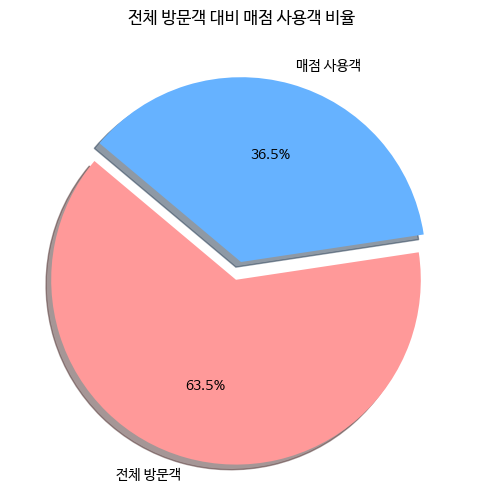

In [36]:
labels = ['전체 방문객', '매점 사용객']
sizes = [customer - user, user]
colors = ['#ff9999','#66b2ff']
explode = (0.1, 0)  # Total Visitors 부분을 약간 돌출시킴

# 비율 시각화
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, shadow=True)
plt.title("전체 방문객 대비 매점 사용객 비율")
plt.show()

매점 사용자 비율을 높이면 매출에 도움이 될것 같다.

### 결론 ###

> 1. 비수기 시즌(방학이나 새벽)에는 입장료 할인 행사나 매점 상품 할인 등의 행사를 진행해 매출 상승 유도 
> 2. 입장티켓을 구매하면 매점 상품 할인 쿠폰 지급등으로 매점 이용율 상승 유도
> 3. 몇몇 상품들은 판매가 저조한걸 보니 가격이 문제가 있는거 같다. 가격조정이 필요해 보인다.

### 프로젝트 목표

> - 모두 카페의 데이터를 가지고 카페에 대한 분석

### 성과 및 결과

> - 해당 데이터를 가지고 많은 것을 시도해보고 해당 데이터에 대해 이해할 수 있는시간과 데이터의 노이즈가 심할 경우 클린징을 얼마나 잘해야 할지에 대해서 알게 되었다.
> - 해당 데이터를 통해서 분석을 하였고, 매출을 올릴수 있는 방법에 대하여 생각하게 되었다.

### 배운 점

> - 해당 데이터를 가지고 많은 것을 시도해보고 해당 데이터에 대해 이해할 수 있는시간과 데이터의 노이즈가 심할 경우 클린징을 얼마나 잘해야 할지에 대해서 알게 되었음.
> - 시각화하는 과정에서 경우에 따라 시각화를 하더라도 가독성이 떨어지는 경우에 대해서 확인할 수 있었다

### 개선할 점 및 아쉬운 점

> - 데이터에 대한 명세가 없어 데이터를 이해하는데 시간이 걸렸으며, 데이터의 노이즈가 심한것으로 보인다.

### 느낀점

> - 데이터의 노이즈가 심해 너무 어떻게 분석을 진행해야할지 데이터의 노이즈를 어떻게 처리해야할지 초반에 감이 잡히지가 않았다.


### 결론

> - 해당 데이터를 가지고 노이즈를 없애는 것에대해서 연습을 할 생각이 들었다.